In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import japanize_matplotlib
from causalnex.structure.notears import from_pandas

In [77]:
def del_city(df, city=None):
    df = df[df["地域"] != city]
    return df

def scaler(x):
    return (2 / (1 + math.exp(-2*x))) - 1

def structure_learning(df, threshold=None):
    input_tr = df.applymap(scaler)
    return from_pandas(input_tr, w_threshold=threshold)

def make_color_list(dag, target_node):
    if target_node not in dag.nodes:
        raise ValueError(f"target_node {target_node} is not in the graph")
    
    incoming_edges = dag.in_edges(target_node)
    source_nodes = [edge[0] for edge in incoming_edges]
    print(f"source_nodes: {source_nodes}")
    
    node_color = []
    edge_color = []
    for node in dag.nodes:
        if node == target_node:
            node_color.append("red")
        elif node in source_nodes:
            node_color.append("blue")
        else:
            node_color.append("gray")
            
    for edge in dag.edges:
        if edge in incoming_edges:
            edge_color.append("blue")
        else:
            edge_color.append("black")
            
    return node_color, edge_color
    

def plot_struct(dag, node_color, edge_color, title, figsize=(15, 15)):
    pos = nx.circular_layout(dag)
    plt.figure(figsize=figsize)
    nx.draw(dag, pos=pos, with_labels=True, node_color=node_color, edge_color=edge_color,font_family="Osaka")
    plt.title(title)
    plt.show()

In [78]:
df = pd.read_csv("/Users/itsukikuwahara/Desktop/codes/research/data/data_pref/df.csv")
df_cr = pd.read_csv("/Users/itsukikuwahara/Desktop/codes/research/data/data_pref/df_cr.csv")

In [79]:
feature = ['若年人口','E8102_在学者1人当たり学校教育費（小学校）【円】', 'C5109_消費者物価指数・保健医療【‐】',
       'C5111_消費者物価指数・教育【‐】', 'E8103_在学者1人当たり学校教育費（中学校）【円】',
       'B120101_評価総地積（田）【ｍ2】', 'E8101_在学者1人当たり学校教育費（幼稚園）【円】',
       'C5107_消費者物価指数・家具・家事用品【‐】', 'D310312_災害復旧費（都道府県財政）【千円】',
       'D2101_財政力指数（都道府県財政）【‐】', 'C5112_消費者物価指数・教養娯楽【‐】',
       'C5110_消費者物価指数・交通・通信【‐】', 'B2104_国立公園面積【ｈａ】',
       'E8104_在学者1人当たり学校教育費（高等学校・全日制）【円】', 'E460402_高等学校卒業者のうち就職者数（女）【人】',
       'C5102_消費者物価指数・帰属家賃を除く総合【‐】', 'B1201_評価総地積（課税対象土地）【ｍ2】',
       'E6302_大学学生数【人】', 'E630201_大学学生数（男）【人】', 'E1301_幼稚園教員数【人】',
       'D3103085_都市計画費（都道府県財政）【千円】', 'D320406_普通建設事業費（市町村財政）【千円】',
       'B1101_総面積（北方地域及び竹島を除く）【ｈａ】', 'E210103_小学校数（私立）【校】',
       'C5103_消費者物価指数・生鮮食品を除く総合（持家の帰属家賃を含む）【‐】',
       'E470201_当該県の高校出身者で当該県の大学入学者数【人】', 'D3203102_小学校費（市町村財政）【千円】',
       'D310105_分担金及び負担金（都道府県財政）【千円】', 'E610203_大学数（私立）【校】',
       'D3105_地方債現在高（都道府県財政）【千円】', 'E410202_高等学校数（定時制）【校】', 'B2101_自然公園面積【ｈａ】',
       'C3801_旅館営業施設数（ホテルを含む）【施設】', 'E620201_大学教員数（男）【人】',
       'E460101_高等学校卒業者数（男）【人】', 'E6202_大学教員数【人】', 'E630102_短期大学学生数（女）【人】',
       'D310313_公債費（都道府県財政）（目的別歳出内訳）【千円】', 'C5101_消費者物価指数・総合（持家の帰属家賃を含む）【‐】',
       'B1108_自然環境保全地域面積【ｈａ】', 'C5106_消費者物価指数・光熱・水道【‐】',
       'B120102_評価総地積（畑）【ｍ2】', 'D410202_目的税（市町村税）【千円】',
       'D3203085_都市計画費（市町村財政）【千円】', 'C5113_消費者物価指数・諸雑費【‐】',
       'D3103032_老人福祉費（都道府県財政）【千円】', 'D320307_商工費（市町村財政）【千円】',
       'I5211_病院病床数【床】', 'D320113_国庫支出金（市町村財政）【千円】', 'J2509_児童館数【所】',
       'D3103045_清掃費（都道府県財政）【千円】']


In [80]:
temp = del_city(df_cr, city="東京都")
temp = del_city(temp, city="大阪府")
temp = temp[feature]

sl = structure_learning(temp,threshold=0.5)

source_nodes: []


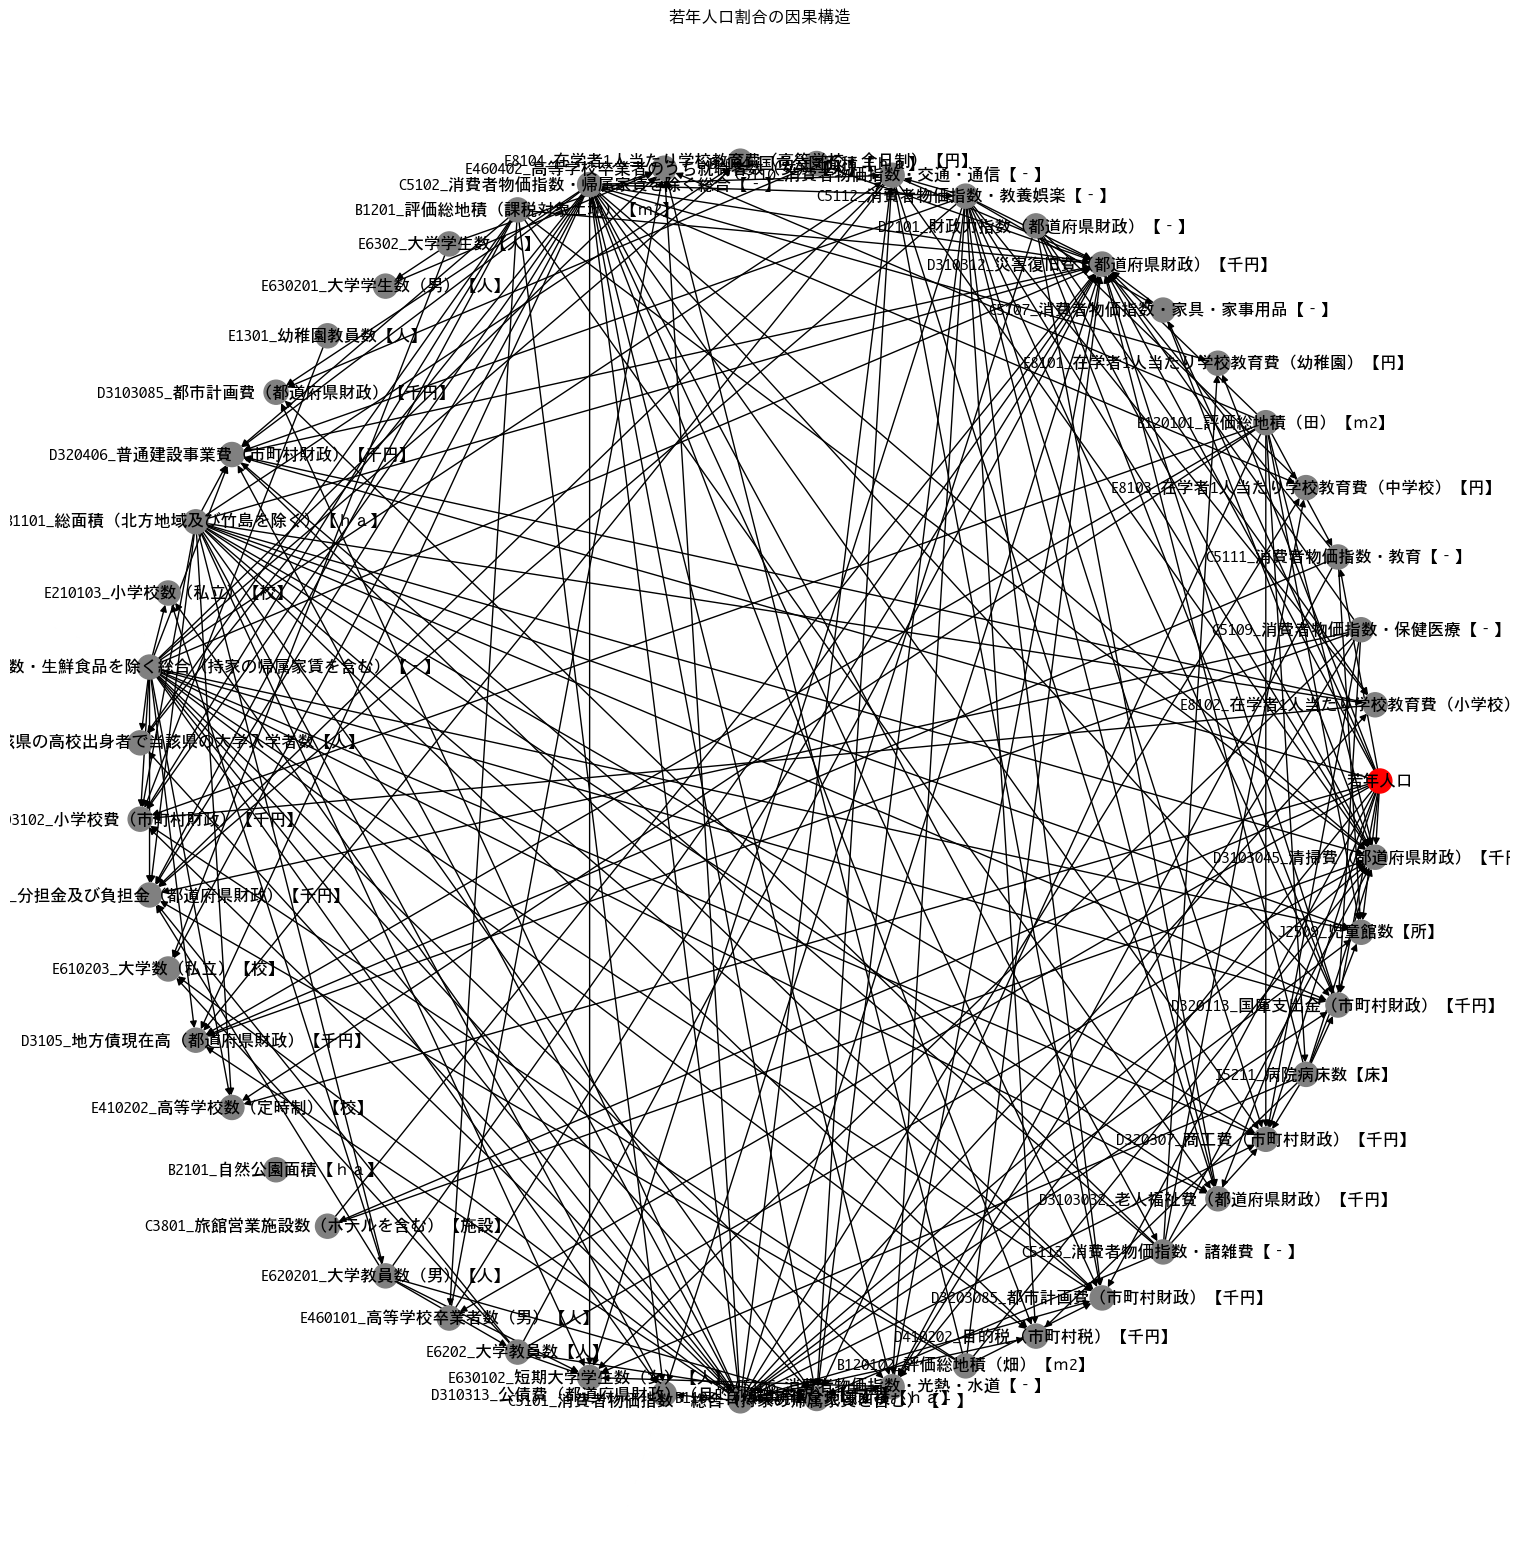

In [82]:
node_colors, edge_colors = make_color_list(sl, target_node="若年人口")
plot_struct(sl, node_colors, edge_colors, "若年人口割合の因果構造")